In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


read in the portfolio json file

In [2]:
portfolio = []
with open('portfolio.json') as f:
    for line in f:
        portfolio.append(json.loads(line))

In [3]:
portfolio

[{'reward': 10,
  'channels': ['email', 'mobile', 'social'],
  'difficulty': 10,
  'duration': 7.0,
  'offer_type': 'bogo',
  'id': 'ae264e3637204a6fb9bb56bc8210ddfd'},
 {'reward': 10,
  'channels': ['web', 'email', 'mobile', 'social'],
  'difficulty': 10,
  'duration': 5.0,
  'offer_type': 'bogo',
  'id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},
 {'reward': 0,
  'channels': ['web', 'email', 'mobile'],
  'difficulty': 0,
  'duration': 4.0,
  'offer_type': 'informational',
  'id': '3f207df678b143eea3cee63160fa8bed'},
 {'reward': 5,
  'channels': ['web', 'email', 'mobile'],
  'difficulty': 5,
  'duration': 7.0,
  'offer_type': 'bogo',
  'id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},
 {'reward': 5,
  'channels': ['web', 'email'],
  'difficulty': 20,
  'duration': 10.0,
  'offer_type': 'discount',
  'id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},
 {'reward': 3,
  'channels': ['web', 'email', 'mobile', 'social'],
  'difficulty': 7,
  'duration': 7.0,
  'offer_type': 'discount',
  'id': '2298d6c36e964ae4

In [4]:
print(type(portfolio))
print(len(portfolio))

<class 'list'>
10


In [5]:
portfolio[4].items()

dict_items([('reward', 5), ('channels', ['web', 'email']), ('difficulty', 20), ('duration', 10.0), ('offer_type', 'discount'), ('id', '0b1e1539f2cc45b7b9fa7c272da2e1d7')])

Make columns from portfolio data to be put in a dataset

In [6]:
reward = [p["reward"] for p in portfolio]
difficulty = [p["difficulty"] for p in portfolio]
duration = [p["duration"] for p in portfolio]
offer_type = [p["offer_type"] for p in portfolio]
id_col = [p["id"] for p in portfolio]
channels_list=[p["channels"] for p in portfolio]

Check all type of channels

In [7]:
channels =[]
for p in portfolio:
    for lst in (p["channels"]):
        channels.append(lst)
channels=set(channels)


In [8]:
channels # all type of channels

{'email', 'mobile', 'social', 'web'}

Make dummy variables for email, mobile, social and web

In [9]:
email=[ 1 if "email" in lst else 0 for lst in channels_list]
mobile=[ 1 if "mobile" in lst else 0 for lst in channels_list]
social=[ 1 if "social" in lst else 0 for lst in channels_list]
web=[ 1 if "web" in lst else 0 for lst in channels_list]

Make dummy variables of offer type

In [10]:
set(offer_type)

{'bogo', 'discount', 'informational'}

In [11]:
bogo=[ 1 if "bogo" in lst else 0 for lst in offer_type]
discount=[ 1 if "discount" in lst else 0 for lst in offer_type]
informational=[ 1 if "informational" in lst else 0 for lst in offer_type]

In [12]:
portfolio_df = pd.DataFrame({"id":id_col,"reward":reward, "difficulty":difficulty, "duration":duration, "bogo":bogo,
                            "discount":discount, "informational":informational,"email":email, "mobile":mobile, "social":social, "web":web})

#### difficulty and duration

In [13]:
set(difficulty)

{0, 5, 7, 10, 20}

In [14]:
set(duration)

{3.0, 4.0, 5.0, 7.0, 10.0}

In [15]:
portfolio_df

,id,reward,difficulty,duration,bogo,discount,informational,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,10,10,7.0,1,0,0,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,10,5.0,1,0,0,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,0,0,4.0,0,0,1,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,7.0,1,0,0,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20,10.0,0,1,0,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,3,7,7.0,0,1,0,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,2,10,10.0,0,1,0,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,0,0,3.0,0,0,1,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5.0,1,0,0,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,2,10,7.0,0,1,0,1,1,0,1


### Comments on portfolio dataset

- reward is the monetary value of the promotion.
- channels is the ways in which the promotion was advertised.
- difficulty is the amount the customer needs to spend in order to receive the reward.
- duration is the total number of days that the promotion was available.
- offer_type is the type of promotion. This is either a money off offer (discount), buy one get one free (BOGO) or a news letter (informational).
- id is the promotion identification.

offer type - bogo/discount/information are mutually exclusive. For certain analysis we may drop one variable
channel - email is in all channels and may be deleted
Is it worthwhile making duration and difficulty  ordinal categorical?

###################
###################
###################
# investigate profile.json

#### load profile.json

In [16]:
profile = []
with open('profile.json') as f:
    for line in f:
        profile.append(json.loads(line))

In [17]:
profile

[{'gender': None,
  'age': 118,
  'id': '68be06ca386d4c31939f3a4f0e3dd783',
  'became_member_on': '20170212',
  'income': None},
 {'gender': 'F',
  'age': 55,
  'id': '0610b486422d4921ae7d2bf64640c50b',
  'became_member_on': '20170715',
  'income': 112000},
 {'gender': None,
  'age': 118,
  'id': '38fe809add3b4fcf9315a9694bb96ff5',
  'became_member_on': '20180712',
  'income': None},
 {'gender': 'F',
  'age': 75,
  'id': '78afa995795e4d85b5d9ceeca43f5fef',
  'became_member_on': '20170509',
  'income': 100000},
 {'gender': None,
  'age': 118,
  'id': 'a03223e636434f42ac4c3df47e8bac43',
  'became_member_on': '20170804',
  'income': None},
 {'gender': 'M',
  'age': 68,
  'id': 'e2127556f4f64592b11af22de27a7932',
  'became_member_on': '20180426',
  'income': 70000},
 {'gender': None,
  'age': 118,
  'id': '8ec6ce2a7e7949b1bf142def7d0e0586',
  'became_member_on': '20170925',
  'income': None},
 {'gender': None,
  'age': 118,
  'id': '68617ca6246f4fbc85e91a2a49552598',
  'became_member_on': 

In [18]:
profile[0]

{'gender': None,
 'age': 118,
 'id': '68be06ca386d4c31939f3a4f0e3dd783',
 'became_member_on': '20170212',
 'income': None}

In [19]:
profile[1]

{'gender': 'F',
 'age': 55,
 'id': '0610b486422d4921ae7d2bf64640c50b',
 'became_member_on': '20170715',
 'income': 112000}

In [20]:
len(profile)

17000

#### create gender list

In [21]:
gender = [p["gender"] for p in profile]

In [22]:
set(gender) # how to deal with missing values/ gender neutral

{'F', 'M', None, 'O'}

#### create age column and investigate

In [23]:
age = [p["age"] for p in profile] 

In [24]:
max(age) # delete people aged 118

118

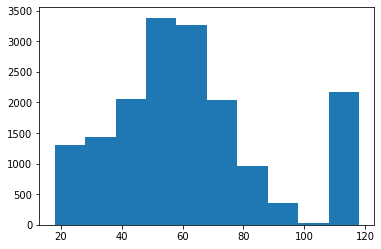

In [25]:
plt.hist(age)
plt.show()

#### other columns

In [26]:
cust_id = [p["id"] for p in profile] 
membership_start = [p["became_member_on"] for p in profile] 
income = [p["income"] for p in profile] 

#### create dataframe

In [27]:
profile_df = pd.DataFrame({"id":cust_id, "gender":gender, "age":age, "membership_start":membership_start, "income":income})
profile_df["membership_start"]=pd.to_datetime(profile_df["membership_start"])
profile_df.head()

,id,gender,age,membership_start,income
0,68be06ca386d4c31939f3a4f0e3dd783,None,118,2017-02-12,NaN
1,0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,None,118,2018-07-12,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0
4,a03223e636434f42ac4c3df47e8bac43,None,118,2017-08-04,NaN


#### investigate columns in dataframe

In [28]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                17000 non-null  object        
 1   gender            14825 non-null  object        
 2   age               17000 non-null  int64         
 3   membership_start  17000 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.2+ KB


In [29]:
profile_df.describe()

,age,membership_start,income
count,17000.000000,17000,14825.000000
mean,62.531412,2017-02-23 13:12:10.164706048,65404.991568
min,18.000000,2013-07-29 00:00:00,30000.000000
25%,45.000000,2016-05-26 00:00:00,49000.000000
50%,58.000000,2017-08-02 00:00:00,64000.000000
75%,73.000000,2017-12-30 00:00:00,80000.000000
max,118.000000,2018-07-26 00:00:00,120000.000000
std,26.738580,NaN,21598.299410


In [30]:
np.sum(pd.isna(profile_df["income"]))

2175

In [31]:
profile_df[profile_df["age"]==118]["gender"] # 118 age na values

0        None
2        None
4        None
6        None
7        None
         ... 
16980    None
16982    None
16989    None
16991    None
16994    None
Name: gender, Length: 2175, dtype: object

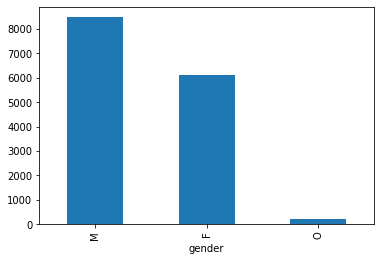

In [32]:
profile_df['gender'].value_counts().plot(kind='bar')
plt.show()

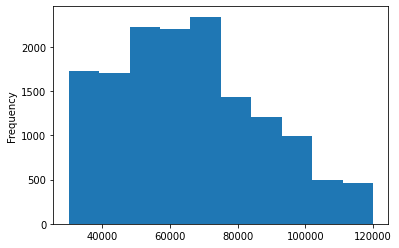

In [33]:
profile_df['income'].plot(kind='hist')
plt.show()

### Comments on Profile

- gender is the identified gender of the customer.
- age is the age of the customer at the time of the promotion period.
- id is the customer membership identification.
- became_member is the date when the customer became a member.
- income is the self reported income of the customer at the time of the promotion period.

##################
# investigate transcript data
# transcript can be used to merge with other two datasets.

In [34]:
transcript = []
with open('transcript.json') as f:
    for line in f:
        transcript.append(json.loads(line))

In [35]:
transcript[0]

{'person': '78afa995795e4d85b5d9ceeca43f5fef',
 'event': 'offer received',
 'value': {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},
 'time': 0}

In [36]:
transcript[1500]

{'person': 'fda2862641d74e19ba0a249a0e3a83f3',
 'event': 'offer received',
 'value': {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},
 'time': 0}

In [37]:
len(transcript)

306534

### create columns

In [38]:
person_id = [p["person"] for p in transcript] 
event = [p["event"] for p in transcript] 
time = [p["time"] for p in transcript] 

In [39]:
set(event)

{'offer completed', 'offer received', 'offer viewed', 'transaction'}

In [40]:
# create dummy variables of transactions
offer_completed=[1 if "offer completed" in lst else 0 for lst in event]
offer_received=[1 if "offer received" in lst else 0 for lst in event]
offer_viewed=[1 if "offer viewed" in lst else 0 for lst in event]
transaction=[1 if "transaction" in lst else 0 for lst in event]

In [41]:
# check number of each event

In [42]:
print(sum(offer_completed))
print(sum(offer_received))
print(sum(offer_viewed))
print(sum(transaction))

33579
76277
57725
138953


In [43]:
# check all dummy variables = observations in transactions
sum(offer_completed)+sum(offer_received)+sum(offer_viewed)+sum(transaction)==len(transcript)

True

#### how to organise the value column

In [44]:
value =  [p["value"] for p in transcript] # discuss amount, offer.id, offer_id and reward

In [45]:
key_list=[]
for dic in value:
    key_list.append(dic.keys())

In [46]:
key_list[-20:]

[dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['offer_id', 'reward']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount']),
 dict_keys(['amount'])]

In [47]:
key_list[:10]

[dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id']),
 dict_keys(['offer id'])]

In [48]:
# analysing all unique keys
all_keys=[]
for dic in value:
    if dic.keys() not in all_keys:
        all_keys.append(dic.keys())
all_keys    

[dict_keys(['offer id']),
 dict_keys(['amount']),
 dict_keys(['offer_id', 'reward'])]

In [49]:
# create the rewards received column
reward = []
for ind,dic in enumerate(value):
    if "reward" in dic.keys():
        reward.append(dic["reward"])
    else:
        reward.append(pd.NA)

In [50]:
#create offer_id column with all offer id and offer_id
offer_id = []
for dic in value:
    if "offer id" in dic.keys():
        offer_id.append(dic["offer id"])
    elif  "offer_id" in dic.keys():
        offer_id.append(dic["offer_id"])
    else:
        offer_id.append(pd.NA)

In [51]:
# create amount column
amount = []
for ind,dic in enumerate(value):
    if "amount" in dic.keys():
        amount.append(dic["amount"])
    else:
        amount.append(pd.NA)

In [52]:
# check offer_id is same length as other columns
offer_id2=0
offer_id3=0
offer_id4=0
for dic in value:
    if "offer id" not in dic.keys() and "offer_id" not in dic.keys():
        offer_id2+=1
for dic in value:
    if "offer id" in dic.keys():
        offer_id3+=1
for dic in value:
    if "offer_id" in dic.keys():
        offer_id4+=1

offer_id2+offer_id3+offer_id4

306534

In [53]:
# create transcript dataframe
transcript_df = pd.DataFrame({"person_id":person_id, "offer_id":offer_id,"time":time, "offer_completed":offer_completed,
                              "offer_received":offer_received, "offer_viewed":offer_viewed, "transaction":transaction,
                              "reward":reward, "amount":amount})

In [54]:
transcript_df.tail(20)

,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
306514,f1e4fd36e5a0446f83861308bddf6945,<NA>,714,0,0,0,1,<NA>,8.2
306515,0b64be3b241c4407a5c9a71781173829,<NA>,714,0,0,0,1,<NA>,2.6
306516,86d03d35d7e0434b935e7743e83be3a0,<NA>,714,0,0,0,1,<NA>,9.2
306517,3408fd05c781401f8442fb6dbaaea9c7,<NA>,714,0,0,0,1,<NA>,11.7
306518,1593d617fac246ef8e50dbb0ffd77f5f,<NA>,714,0,0,0,1,<NA>,40.67
306519,f1b31d07b5d84f69a2d5f1d07843989e,<NA>,714,0,0,0,1,<NA>,31.13
306520,2ce987015ec0404a97ba333e8e814090,<NA>,714,0,0,0,1,<NA>,1.64
306521,2e33545f0a764d27b2ccff95fc8d72c4,<NA>,714,0,0,0,1,<NA>,17.35
306522,d1c4500ace2e45e9a45d3cd2fccac8d8,<NA>,714,0,0,0,1,<NA>,4.42
306523,b65affd9e07346a1906364a396950e3d,<NA>,714,0,0,0,1,<NA>,18.35


In [55]:
# quick observation of the data
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   person_id        306534 non-null  object
 1   offer_id         167581 non-null  object
 2   time             306534 non-null  int64 
 3   offer_completed  306534 non-null  int64 
 4   offer_received   306534 non-null  int64 
 5   offer_viewed     306534 non-null  int64 
 6   transaction      306534 non-null  int64 
 7   reward           33579 non-null   object
 8   amount           138953 non-null  object
dtypes: int64(5), object(4)
memory usage: 21.0+ MB


In [56]:
transcript_df.describe()

,time,offer_completed,offer_received,offer_viewed,transaction
count,306534.000000,306534.000000,306534.000000,306534.000000,306534.000000
mean,366.382940,0.109544,0.248837,0.188315,0.453304
std,200.326314,0.312321,0.432340,0.390964,0.497815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.000000,0.000000,0.000000,0.000000,0.000000
50%,408.000000,0.000000,0.000000,0.000000,0.000000
75%,528.000000,0.000000,0.000000,0.000000,1.000000
max,714.000000,1.000000,1.000000,1.000000,1.000000


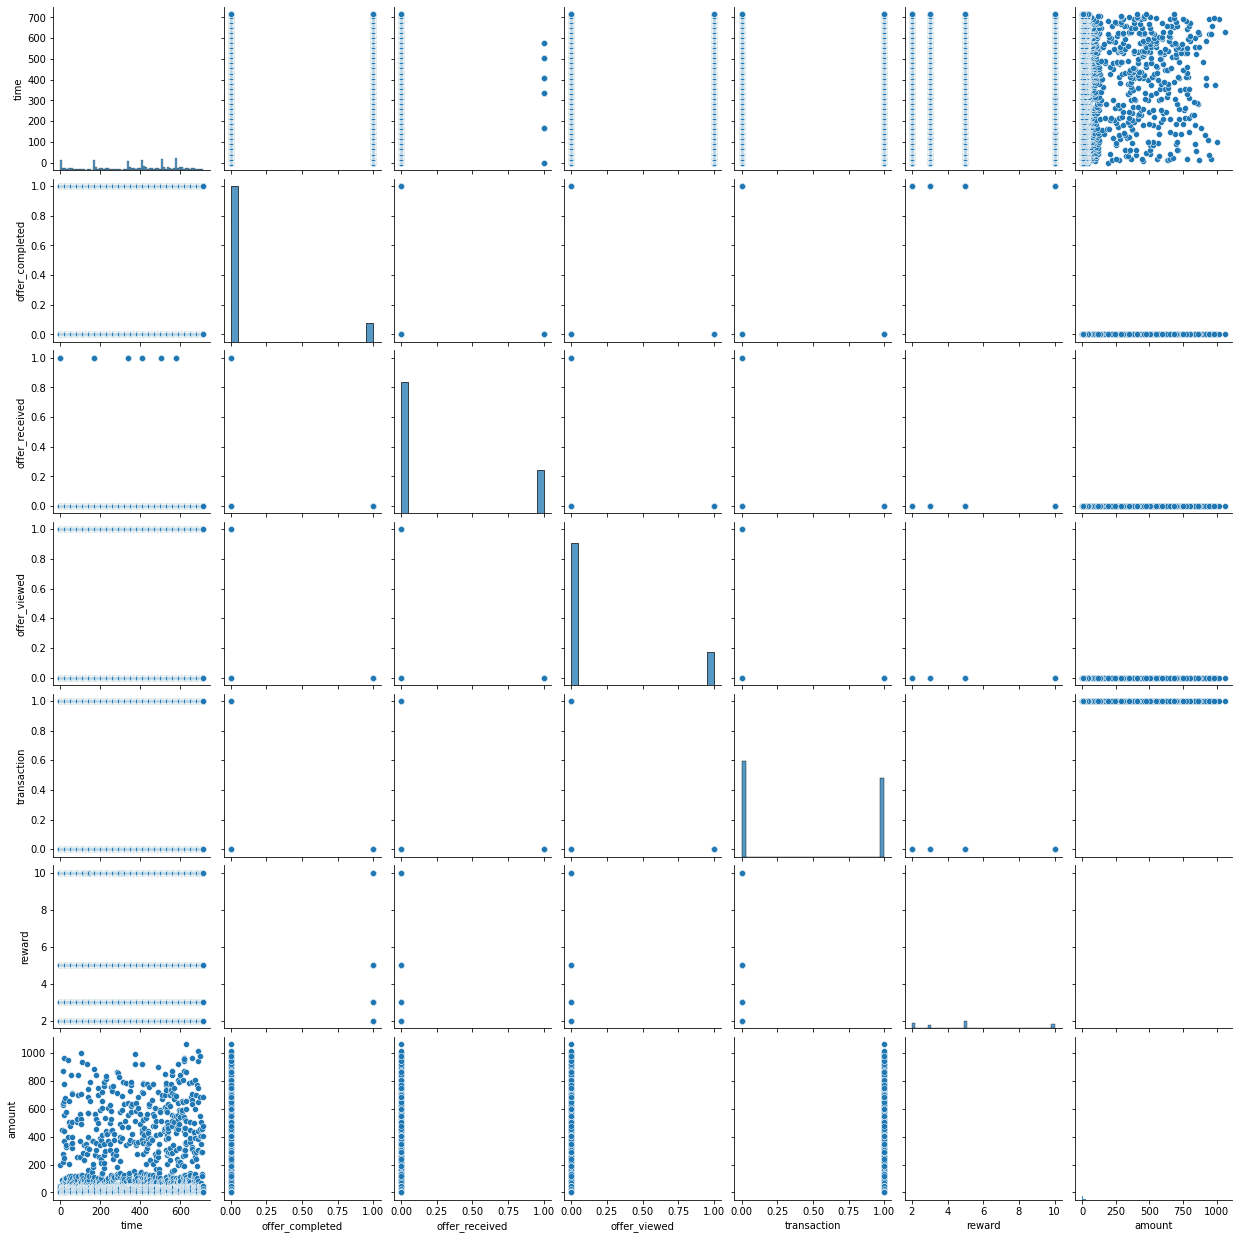

In [59]:
# check pairs plot (slow)
sns.pairplot(transcript_df)

In [57]:
# offer id and amount mutually exclusive
transcript_df[["offer_id", "amount"]]

,offer_id,amount
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,<NA>
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,<NA>
2,2906b810c7d4411798c6938adc9daaa5,<NA>
3,fafdcd668e3743c1bb461111dcafc2a4,<NA>
4,4d5c57ea9a6940dd891ad53e9dbe8da0,<NA>
...,...,...
306529,<NA>,1.59
306530,<NA>,9.53
306531,<NA>,3.61
306532,<NA>,3.53


In [58]:
# min and max amount people spend removing na (na maybe should be changed to zero?)
transcript_df[["person_id", "amount"]].groupby("person_id").agg("mean").sort_values(by="amount").dropna()

,amount
person_id,
999338157fd54f639b089cef0038e06a,0.05
fc3444ae44044a218e160522f7de8d8d,0.05
4828b93dd6dd44eb9ec8417f0564a9b9,0.05
11d87e606c2f4d649fe09a5e84d048c2,0.05
37ca07481c124d98ac1eaca5ee1f4146,0.1
...,...
522b72f9438c4075907733273f11f07e,278.61
6cf884a6c5ae4b2daccb6d3108028fef,291.315
0cc6e8553c844c02ab525bc466aa569b,301.31


In [59]:
# number of observations and different observations with number of unique variables
transcript_df.groupby('person_id').agg(['count', 'nunique'])

offer_id          time          \
                                    count nunique count nunique   
person_id                                                         
0009655768c64bdeb2e877511632db8f       12       5    20      16   
00116118485d4dfda04fdbaba9a87b5c        4       1     7       7   
0011e0d4e6b944f998e987f904e8c1e5       13       5    18      15   
0020c2b971eb4e9188eac86d93036a77       11       4    19      16   
0020ccbbb6d84e358d3414a3ff76cffd       11       4    23      18   
...                                   ...     ...   ...     ...   
fff3ba4757bd42088c044ca26d73817a       12       4    23      17   
fff7576017104bcc8677a8d63322b5e1       12       4    18      15   
fff8957ea8b240a6b5e634b6ee8eafcf        5       3    10       9   
fffad4f4828548d1b5583907f2e9906b       11       3    23      19   
ffff82501cea40309d5fdd7edcca4a07       18       4    33      24   

                                 offer_completed         offer_received  \
                                           count nunique          count   
person_id                                                                 
0009655768c64bdeb2e877511632db8f              20       2             20   
00116118485d4dfda04fdbaba9a87b5c               7       1              7   
0011e0d4e6b944f998e987f904e8c1e5              18       2             18   
0020c2b971eb4e9188eac86d93036a77              19       2             19   
0020ccbbb6d84e358d3414a3ff76cffd              23       2             23   
...                                          ...     ...            ...   
fff3ba4757bd42088c044ca26d73817a              23       2             23   
fff7576017104bcc8677a8d63322b5e1              18       2             18   
fff8957ea8b240a6b5e634b6ee8eafcf              10       1             10   
fffad4f4828548d1b5583907f2e9906b              23       2             23   
ffff82501cea40309d5fdd7edcca4a07              33       2             33   

                                         offer_viewed         transaction  \
                                 nunique        count nunique       count   
person_id                                                                   
0009655768c64bdeb2e877511632db8f       2           20       2          20   
00116118485d4dfda04fdbaba9a87b5c       2            7       2           7   
0011e0d4e6b944f998e987f904e8c1e5       2           18       2          18   
0020c2b971eb4e9188eac86d93036a77       2           19       2          19   
0020ccbbb6d84e358d3414a3ff76cffd       2           23       2          23   
...                                  ...          ...     ...         ...   
fff3ba4757bd42088c044ca26d73817a       2           23       2          23   
fff7576017104bcc8677a8d63322b5e1       2           18       2          18   
fff8957ea8b240a6b5e634b6ee8eafcf       2           10       2          10   
fffad4f4828548d1b5583907f2e9906b       2           23       2          23   
ffff82501cea40309d5fdd7edcca4a07       2           33       2          33   

                                         reward         amount          
                                 nunique  count nunique  count nunique  
person_id                                                               
0009655768c64bdeb2e877511632db8f       2      3       2      8       8  
00116118485d4dfda04fdbaba9a87b5c       2      0       0      3       3  
0011e0d4e6b944f998e987f904e8c1e5       2      3       2      5       5  
0020c2b971eb4e9188eac86d93036a77       2      3       2      8       8  
0020ccbbb6d84e358d3414a3ff76cffd       2      3       2     12      12  
...                                  ...    ...     ...    ...     ...  
fff3ba4757bd42088c044ca26d73817a       2      3       2     11      11  
fff7576017104bcc8677a8d63322b5e1       2      3       2      6       6  
fff8957ea8b240a6b5e634b6ee8eafcf       2      0       0      5       5  
fffad4f4828548d1b5583907f2e9906b       2      3       1     12      12  
ffff82501cea403

In [62]:
# investigating individual transactions
transcript_df[transcript_df["person_id"]=="00116118485d4dfda04fdbaba9a87b5c"]

,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
56475,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,168,0,1,0,0,<NA>,<NA>
85769,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,216,0,0,1,0,<NA>,<NA>
104088,00116118485d4dfda04fdbaba9a87b5c,<NA>,294,0,0,0,1,<NA>,0.7
187632,00116118485d4dfda04fdbaba9a87b5c,<NA>,456,0,0,0,1,<NA>,0.2
193680,00116118485d4dfda04fdbaba9a87b5c,<NA>,474,0,0,0,1,<NA>,3.19
248359,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,576,0,1,0,0,<NA>,<NA>
284472,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,630,0,0,1,0,<NA>,<NA>


In [61]:
# events at same time
transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"][transcript_df["time"]==576]

<ipython-input-61-f81397f175f2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"][transcript_df["time"]==576]


,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
247879,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,0,1,0,0,<NA>,<NA>
258883,0009655768c64bdeb2e877511632db8f,<NA>,576,0,0,0,1,<NA>,10.27
258884,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,1,0,0,0,2,<NA>


In [63]:
transcript_df[transcript_df["person_id"]=="0011e0d4e6b944f998e987f904e8c1e5"]

,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
3066,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0,0,1,0,0,<NA>,<NA>
16179,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,6,0,0,1,0,<NA>,<NA>
47805,0011e0d4e6b944f998e987f904e8c1e5,<NA>,132,0,0,0,1,<NA>,13.49
56298,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,168,0,1,0,0,<NA>,<NA>
75427,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,186,0,0,1,0,<NA>,<NA>
95421,0011e0d4e6b944f998e987f904e8c1e5,<NA>,252,0,0,0,1,<NA>,11.93
95422,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,252,1,0,0,0,3,<NA>
113919,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,336,0,1,0,0,<NA>,<NA>
133370,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,354,0,0,1,0,<NA>,<NA>
153697,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408,0,1,0,0,<NA>,<NA>


In [60]:
# investigating individual transactions
transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"]

,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
55972,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168,0,1,0,0,<NA>,<NA>
77705,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,192,0,0,1,0,<NA>,<NA>
89291,0009655768c64bdeb2e877511632db8f,<NA>,228,0,0,0,1,<NA>,22.16
113605,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336,0,1,0,0,<NA>,<NA>
139992,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,372,0,0,1,0,<NA>,<NA>
153401,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408,0,1,0,0,<NA>,<NA>
168412,0009655768c64bdeb2e877511632db8f,<NA>,414,0,0,0,1,<NA>,8.57
168413,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,414,1,0,0,0,5,<NA>
187554,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,456,0,0,1,0,<NA>,<NA>
204340,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504,0,1,0,0,<NA>,<NA>


In [75]:
# average amount per transaction per customer
average_transaction=transcript_df[["person_id","amount"]].groupby('person_id').mean()

<Axes: xlabel='amount', ylabel='Count'>

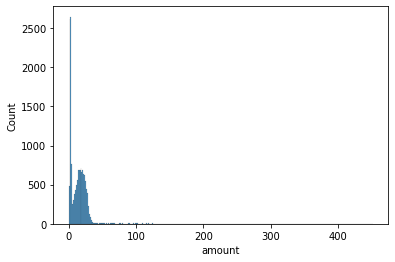

In [76]:
# hist of average customer spend. Possibly remove extreme values. Keep in until clustering process as they may be business accounts?
sns.histplot(data=average_transaction, x="amount")
plt.show()

(0.0, 50.0)

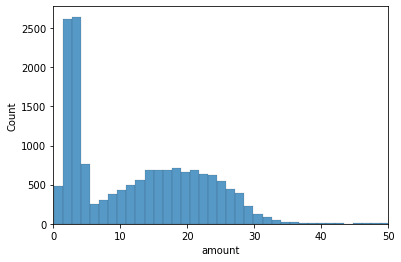

In [78]:
# hist ofaverage at majority of data. Appear to be two spending groups. Possibly group1 coffee on the go and group2 lunch/family/sit down group
sns.histplot(data=average_transaction, x="amount")
plt.xlim((0,50))
plt.show()

In [79]:
# total amount spent per customer
total_transaction=transcript_df[["person_id","amount"]].groupby('person_id').sum()

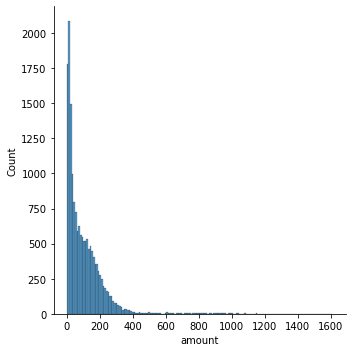

In [130]:
# data right skewed
sns.displot(total_transaction["amount"])
# plt.xlim((0,50))

(0.0, 600.0)

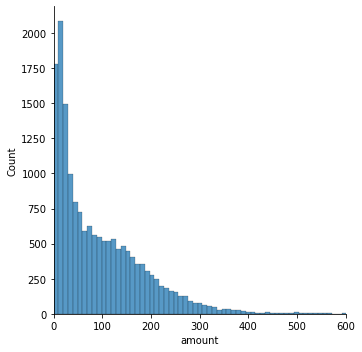

In [129]:
# total spent per customer
sns.displot(total_transaction["amount"])
plt.xlim((0,600))

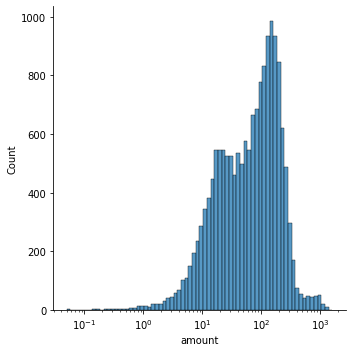

In [131]:
# total spent per customer log scale to normalise the data
sns.displot(total_transaction["amount"], log_scale=True)

In [85]:
# percentage of offers completed
offer_count=transcript_df[["offer_id","offer_received","offer_viewed","offer_completed"]].groupby('offer_id').sum()
offer_count

,offer_received,offer_viewed,offer_completed
offer_id,,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,7668,2663,3420
2298d6c36e964ae4a3e7e9706d1fb8c2,7646,7337,5156
2906b810c7d4411798c6938adc9daaa5,7632,4118,4017
3f207df678b143eea3cee63160fa8bed,7617,4144,0
4d5c57ea9a6940dd891ad53e9dbe8da0,7593,7298,3331
5a8bc65990b245e5a138643cd4eb9837,7618,6687,0
9b98b8c7a33c4b65b9aebfe6a799e6d9,7677,4171,4354
ae264e3637204a6fb9bb56bc8210ddfd,7658,6716,3688
f19421c1d4aa40978ebb69ca19b0e20d,7571,7264,4296


In [87]:
# notice top row, offer viewed less than completed. Where they buying the coffee when told by cashier about the reward?
offer_count["perc_ov"]=offer_count["offer_viewed"]/offer_count["offer_received"]
offer_count["perc_oc"]=offer_count["offer_completed"]/offer_count["offer_received"]
offer_count

,offer_received,offer_viewed,offer_completed,perc_ov,perc_oc
offer_id,,,,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,7668,2663,3420,0.347287,0.446009
2298d6c36e964ae4a3e7e9706d1fb8c2,7646,7337,5156,0.959587,0.674340
2906b810c7d4411798c6938adc9daaa5,7632,4118,4017,0.539570,0.526336
3f207df678b143eea3cee63160fa8bed,7617,4144,0,0.544046,0.000000
4d5c57ea9a6940dd891ad53e9dbe8da0,7593,7298,3331,0.961148,0.438694
5a8bc65990b245e5a138643cd4eb9837,7618,6687,0,0.877789,0.000000
9b98b8c7a33c4b65b9aebfe6a799e6d9,7677,4171,4354,0.543311,0.567149
ae264e3637204a6fb9bb56bc8210ddfd,7658,6716,3688,0.876991,0.481588
f19421c1d4aa40978ebb69ca19b0e20d,7571,7264,4296,0.959451,0.567428


[]

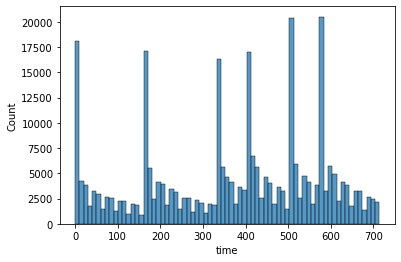

In [89]:
# look into time
# peaks the times the offers are received
sns.histplot(data=transcript_df, x="time")
plt.plot()

In [111]:
# offers are all received at the same time
offers_received_time= transcript_df[["offer_id", "offer_received", "time"]].groupby(["offer_id", "time"]).sum()
offers_received_time[offers_received_time["offer_received"]!=0]

offer_received
offer_id                         time                
0b1e1539f2cc45b7b9fa7c272da2e1d7 0               1297
                                 168             1245
                                 336             1322
                                 408             1269
                                 504             1258
                                 576             1277
2298d6c36e964ae4a3e7e9706d1fb8c2 0               1221
                                 168             1250
                                 336             1301
                                 408             1274
                                 504             1286
                                 576             1314
2906b810c7d4411798c6938adc9daaa5 0               1257
                                 168             1270
                                 336             1263
                                 408             1335
                                 504             1286
                                 576             1221
3f207df678b143eea3cee63160fa8bed 0               1273
                                 168             1266
                                 336             1279
                                 408             1275
                                 504             1229
                                 576             1295
4d5c57ea9a6940dd891ad53e9dbe8da0 0               1218
                                 168             1240
                                 336             1280
                                 408             1308
                                 504             1310
                                 576             1237
5a8bc65990b245e5a138643cd4eb9837 0               1266
                                 168             1270
                                 336             1256
                                 408             1293
                                 504             1238
                                 576             1295
9b98b8c7a33c4b65b9aebfe6a799e6d9 0               1245
                                 168             1296
                                 336             1275
                                 408             1274
                                 504             1261
                                 576             1326
ae264e3637204a6fb9bb56bc8210ddfd 0               1292
                                 168             1319
                                 336             1245
                                 408             1278
                                 504             1248
                                 576             1276
f19421c1d4aa40978ebb69ca19b0e20d 0               1263
                                 168             1263
                                 336             1247
                                 408             1250
                                 504             1305
                                 576             1243
fafdcd668e3743c1bb461111dcafc2a4 0               1318
                                 168             1250
                                 336             1243
                                 408             1222
                                 504             1283
                                 576             1281

In [119]:
# looking into count of offers received
offer_received_data=transcript_df[["person_id","offer_id","offer_received"]][transcript_df["offer_received"]==1]

In [165]:
# offers count is often similar to unique offer_id
count_unique_offer= offer_received_data.groupby("person_id").agg(["count","nunique"])["offer_id"]
count_unique_offer

,count,nunique
person_id,,
0009655768c64bdeb2e877511632db8f,5,5
00116118485d4dfda04fdbaba9a87b5c,2,1
0011e0d4e6b944f998e987f904e8c1e5,5,5
0020c2b971eb4e9188eac86d93036a77,5,4
0020ccbbb6d84e358d3414a3ff76cffd,4,4
...,...,...
fff3ba4757bd42088c044ca26d73817a,6,4
fff7576017104bcc8677a8d63322b5e1,5,4
fff8957ea8b240a6b5e634b6ee8eafcf,3,3


In [170]:
# rmse of difference between offer received and unique offers received
np.sqrt(sum((count_unique_offer["count"]-count_unique_offer["nunique"])**2)/count_unique_offer.shape[0])

1.0750084502816728

In [124]:
# max number of offers received
offer_received_data.groupby("person_id").agg(["count","nunique"])["offer_id"].max()

count      6
nunique    6
dtype: int64

In [125]:
# min offer
# check membership date - is this membership date later
offer_received_data.groupby("person_id").agg(["count","nunique"])["offer_id"].min()

count      1
nunique    1
dtype: int64

In [140]:
# amount count in time periods
amount_count_time=transcript_df[["time","amount"]].groupby("time").count()
amount_count_time

,amount
time,
0,633
6,797
12,850
18,879
24,922
...,...
690,1043
696,1104
702,955


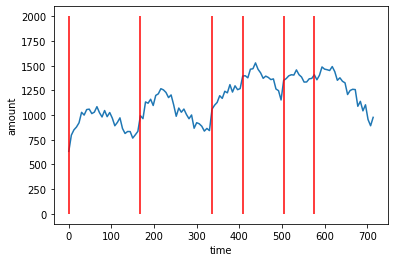

In [149]:
# timeline of number of transactions (amounts) completed. Red line represents offers received

sns.lineplot( amount_count_time["amount"])
plt.vlines(x=[0,168,336,408,504,576], ymin=0, ymax=2000, colors="red")

In [153]:
# transactions separated into times when offer is received
trans1= transcript_df[transcript_df["time"]<168]
trans2= transcript_df[(transcript_df["time"]<336) & (transcript_df["time"]>=168)]
trans3= transcript_df[(transcript_df["time"]<408) & (transcript_df["time"]>=336)]
trans4= transcript_df[(transcript_df["time"]<504) & (transcript_df["time"]>=408)]
trans5= transcript_df[(transcript_df["time"]>=504)]

In [160]:
# total amount between timeframes divided by the number of unique time elements to make the amounts more interpretable
print(trans1["amount"].sum()/trans1["time"].nunique())
print(trans1["offer_completed"].sum()/trans1["time"].nunique())
print("-------------------------------")
print(trans2["amount"].sum()/trans2["time"].nunique())
print(trans2["offer_completed"].sum()/trans2["time"].nunique())
print("-------------------------------")
print(trans3["amount"].sum()/trans3["time"].nunique())
print(trans3["offer_completed"].sum()/trans3["time"].nunique())
print("-------------------------------")
print(trans4["amount"].sum()/trans4["time"].nunique())
print(trans4["offer_completed"].sum()/trans4["time"].nunique())
print("-------------------------------")
print(trans5["amount"].sum()/trans5["time"].nunique())
print(trans5["offer_completed"].sum()/trans5["time"].nunique())


11689.033928571333
166.35714285714286
-------------------------------
13252.997142857139
196.75
-------------------------------
15138.672500000037
317.75
-------------------------------
17514.63312499991
404.75
-------------------------------
17088.247222222253
364.52777777777777


In [164]:
# offer_id amount mutually exclusive. We can maybe use the unique id offered between timeframe as offer id for the amount
trans1[["offer_id","amount"]]

,offer_id,amount
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,<NA>
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,<NA>
2,2906b810c7d4411798c6938adc9daaa5,<NA>
3,fafdcd668e3743c1bb461111dcafc2a4,<NA>
4,4d5c57ea9a6940dd891ad53e9dbe8da0,<NA>
...,...,...
53169,<NA>,0.44
53170,<NA>,15.09
53171,<NA>,6.95
53172,<NA>,1.18


In [64]:
# investigating individual offer id for one person 
transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"][transcript_df["offer_id"]=="5a8bc65990b245e5a138643cd4eb9837"]

<ipython-input-64-e008c6fd80e5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"][transcript_df["offer_id"]=="5a8bc65990b245e5a138643cd4eb9837"]


,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
55972,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168,0,1,0,0,<NA>,<NA>
77705,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,192,0,0,1,0,<NA>,<NA>


### Comments on transcript

- person is the customer membership identification.
- event is the event - either offer received, offer viewed, offer complete or transaction.
- value.offer.id is the promotion identification.
- value.amount is the amount spent in GBP for a given transaction.
- value.offer_id is the promotion identification.
- value.reward is the monetary value of the promotion.
- time time from the beginning of the promotion period.

Looking at each individual's transactions helps to show the process of claiming a reward. It looks like offer is received, then offer_viewed (not always viewed before completed) and completed. Transactions and rewards are recorded at different time frames. There is one example when the offer is received at the same time as transaction and claimed.In the case study, I think he possibly removed offers not viewed and completed. I need to read again.

Batches of offre are sent to customers in batches and looks like they may be assigned randomly. Most looks like they will get the offer once but they sometimes receive the same offer twice.

Time is 6 units of increment. If hours it is over a period of 2 months.

Offers are sent time 0, 168,336,408,504 and 576. Different codes are sent to different customers at each time frame. Count of purchases (amount) show increase number of sales after these time frames before reducing again.

It may be possible to use the offer they received during a time frame to link it to offer id. e.g. the offer id for any amount between 0 and 167 we could change offer_id received at 0. However time frames between offers are different and duration of offers are different, so we may need to discuss how we connect amount to offer_id, based on what is feasible and what may give the best results

# Create csv

In [61]:
portfolio_df.to_csv("portfolio.csv")
profile_df.to_csv("profile.csv")
transcript_df.to_csv("transcript.csv")

# Merged data

In [62]:
merged_data=pd.merge(transcript_df, profile_df, how = "inner", left_on="person_id", right_on="id")
merged_data=pd.merge(merged_data, portfolio_df, how = "inner", left_on="offer_id", right_on="id")
merged_data.head(10)

,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward_x,amount,id_x,...,reward_y,difficulty,duration,bogo,discount,informational,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,0,0,<NA>,<NA>,78afa995795e4d85b5d9ceeca43f5fef,...,5,5,7.0,1,0,0,1,1,0,1
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,0,0,1,0,<NA>,<NA>,78afa995795e4d85b5d9ceeca43f5fef,...,5,5,7.0,1,0,0,1,1,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,1,0,0,0,5,<NA>,78afa995795e4d85b5d9ceeca43f5fef,...,5,5,7.0,1,0,0,1,1,0,1
3,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,408,0,1,0,0,<NA>,<NA>,e2127556f4f64592b11af22de27a7932,...,5,5,7.0,1,0,0,1,1,0,1
4,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,420,0,0,1,0,<NA>,<NA>,e2127556f4f64592b11af22de27a7932,...,5,5,7.0,1,0,0,1,1,0,1
5,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,522,1,0,0,0,5,<NA>,e2127556f4f64592b11af22de27a7932,...,5,5,7.0,1,0,0,1,1,0,1
6,68617ca6246f4fbc85e91a2a49552598,9b98b8c7a33c4b65b9aebfe6a799e6d9,504,0,1,0,0,<NA>,<NA>,68617ca6246f4fbc85e91a2a49552598,...,5,5,7.0,1,0,0,1,1,0,1
7,68617ca6246f4fbc85e91a2a49552598,9b98b8c7a33c4b65b9aebfe6a799e6d9,648,0,0,1,0,<NA>,<NA>,68617ca6246f4fbc85e91a2a49552598,...,5,5,7.0,1,0,0,1,1,0,1
8,389bc3fa690240e798340f5a15918d5c,9b98b8c7a33c4b65b9aebfe6a799e6d9,168,0,1,0,0,<NA>,<NA>,389bc3fa690240e798340f5a15918d5c,...,5,5,7.0,1,0,0,1,1,0,1
9,389bc3fa690240e798340f5a15918d5c,9b98b8c7a33c4b65b9aebfe6a799e6d9,192,0,0,1,0,<NA>,<NA>,389bc3fa690240e798340f5a15918d5c,...,5,5,7.0,1,0,0,1,1,0,1


In [ ]:
sns.scatterplot(data=merged_data, x="amount", y="income",hue="gender")
plt.show()